<a href="https://colab.research.google.com/github/lpitts235286/CS-4410/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [2]:
# Load dataset
breast_cancer = load_breast_cancer()

# Features and target
X = breast_cancer.data
y = breast_cancer.target

# Check sizes
print("Samples (rows):", X.shape[0])
print("Features (columns):", X.shape[1])
print("Target size:", y.shape)


Samples (rows): 569
Features (columns): 30
Target size: (569,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 426
Testing set size: 143


In [4]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict
y_pred = nb.predict(X_test)

# Score
print("Accuracy (GaussianNB):", nb.score(X_test, y_test))


Accuracy (GaussianNB): 0.9370629370629371


Confusion Matrix:
 [[46  7]
 [ 2 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91        53
           1       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



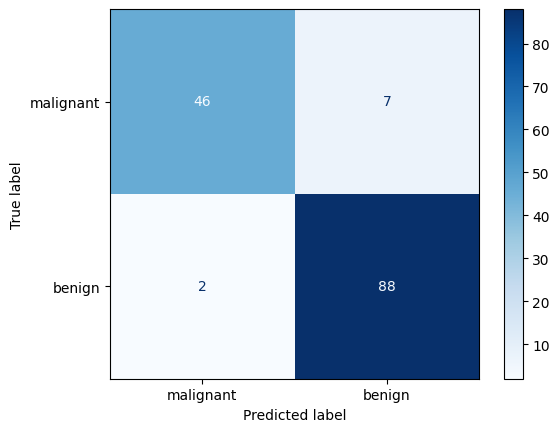

In [5]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [6]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=X, y=y, cv=kfold)

print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-validation scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]
Mean CV Accuracy: 0.9384711779448622


In [7]:
estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for name, model in estimators.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")


GaussianNB Accuracy: 0.9371
KNeighborsClassifier Accuracy: 0.9301


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression Accuracy: 0.9580
SVC Accuracy: 0.9231
